In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import gym

from stable_baselines3 import A2C

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN
import gym_anytrading

In [10]:
df = gym_anytrading.datasets.STOCKS_GOOGL.copy()

window_size = 10
start_index = window_size
end_index = len(df)

env_maker = lambda: gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
)

env = DummyVecEnv([env_maker])

In [13]:
# policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000, log_interval=4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 300      |
|    iterations         | 4        |
|    time_elapsed       | 0        |
|    total_timesteps    | 20       |
| train/                |          |
|    entropy_loss       | -0.983   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3        |
|    policy_loss        | 0.0941   |
|    value_loss         | 0.541    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 318       |
|    iterations         | 8         |
|    time_elapsed       | 0         |
|    total_timesteps    | 40        |
| train/                |           |
|    entropy_loss       | -0.914    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_u

In [14]:
env = env_maker()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)
    print("info:", info)
    # env.render()
    if done:
        print("info:", info)
        break

info: {'total_reward': 0.0, 'total_profit': 1.0, 'action': array([1], dtype=int64)}
info: {'total_reward': 0.0, 'total_profit': 1.0, 'action': array([1], dtype=int64)}
info: {'total_reward': 0.0, 'total_profit': 1.0, 'action': array([1], dtype=int64)}
info: {'total_reward': 0.0, 'total_profit': 1.0, 'action': array([1], dtype=int64)}
info: {'total_reward': 0.0, 'total_profit': 1.0, 'action': array([1], dtype=int64)}
info: {'total_reward': 0.3853909999999985, 'total_profit': 0.9868733162459986, 'action': array([0], dtype=int64)}
info: {'total_reward': 0.3853909999999985, 'total_profit': 0.9868733162459986, 'action': array([1], dtype=int64)}
info: {'total_reward': 0.3853909999999985, 'total_profit': 0.9868733162459986, 'action': array([1], dtype=int64)}
info: {'total_reward': 0.3853909999999985, 'total_profit': 0.9868733162459986, 'action': array([1], dtype=int64)}
info: {'total_reward': 0.3853909999999985, 'total_profit': 0.9868733162459986, 'action': array([1], dtype=int64)}
info: {'to

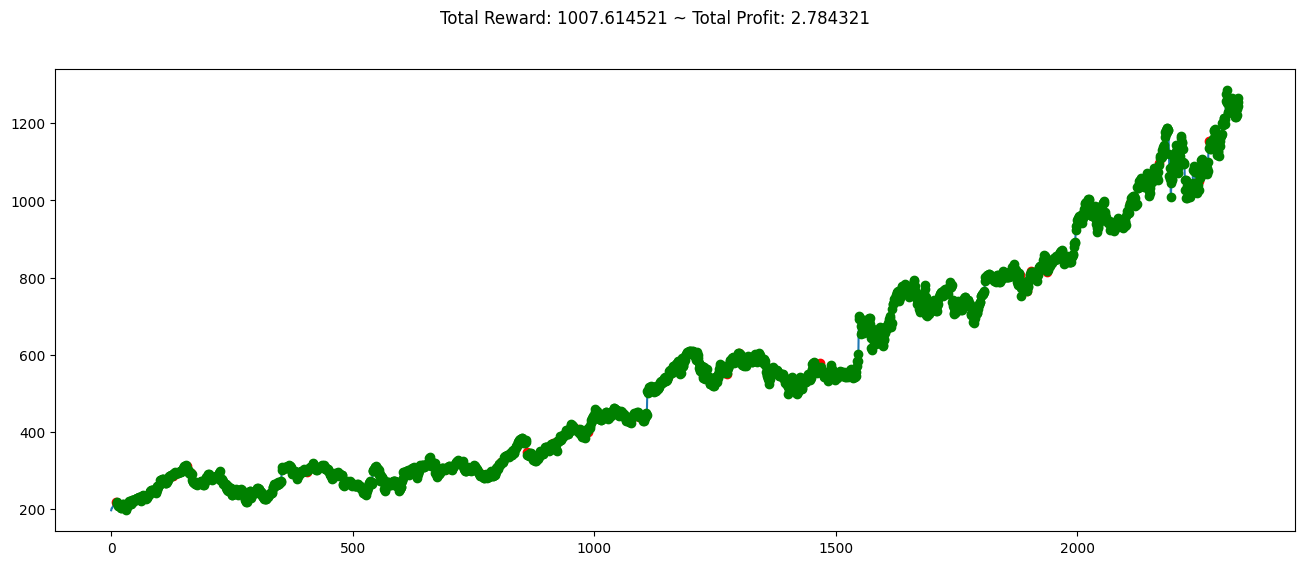

In [23]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()